# 1.什么是类？

# 2.什么是继承？
- 什么是_init_？
- 子类和父类属性冲突怎么办？
- 什么是super()\_init\_()？
- 两个括号的内容是什么，什么时候需要加？

首先，我们要回顾一下python中的类class。

使用名为x的属性，创建一个名为person的类：

In [8]:
class person(object):#object可以不加
    name = 'xiaoming'

p1 = person()
print(p1.name)

xiaoming


## __init__() 函数

上面的例子是最简单形式的类和对象，在实际应用程序中并不真正有用。

要理解类的含义，我们必须先了解内置的 __init__() 函数。

所有类都有一个名为 __init__() 的函数，它始终在启动类时执行。（也可以理解为自动调用）

使用 __init__() 函数将值赋给对象属性，或者在创建对象时需要执行的其他操作：

In [12]:
class person():
    def __init__(self,name,score):
        self.name = name
        self.score = score

p1 = person('xiong','100')

print(p1.name)
print(p1.score)

xiong
100


In [22]:
class person():
    
    
    def __init__(self):
          print('ok')#在定义这个实例的时候执行，同时执行了print

p1 = person()

p1

ok


## 对象方法
对象中的方法是属于该对象的函数

In [70]:
class person():
    def __init__(self,name,score):
        self.name = name
        self.score = score
    #类的属性
    def myfunc(self,name):
        print('Hi,This is '+ self.name)
    #类的方法
    
p1 = person('Bob','100')

p1.myfunc('1')
print(p1.name)
#self 参数是对类的当前实例的引用，用于访问属于该类的变量。

Hi,This is Bob
Bob


除此之外，我们还可以对对象的属性进行修改，例如p1.score = 90之类，在此不再赘述
我们接下来讲解最重要的Python继承，这也是我们理解super()函数的重点
## Python继承

**继承**允许我们定义继承另一个类的所有方法和类的属性。

**父类**是继承的类，也称为基类。

**子类**是从另一个类继承的类，也称为派生类。

In [72]:
class person():
    def __init__(self,name,score):
        self.name = name
        self.score = score
    
    def myfunc(self):
        print('Hi,This is '+self.name)
#如果我们不想对于一个类添加任何其他属性和方法，就使用pass关键字。
class student(person):
    pass

x = student('Alice','101')
y = person('Elon','102')

print(x.score)
print(y.score)
x.myfunc()

101
102
Hi,This is Alice


- Object是一个原始类，我们一般在没有父类的情况下使用它，不这样定义可能会出错。

- 如果我们为子类student添加init函数，会使子类不再继承父类的init函数（姓名，分数）等等。

In [17]:
class student(person):
    def __init__(self,name,gender):
        self.gender = gender

z = student('Bob','100')
z.gender

#z = student('Bob') z.gender


'100'

子的 __init__() 函数会覆盖对父的 __init__() 函数的继承。

如需保持父的 __init__() 函数的继承，请添加对父的 __init__() 函数的调用：

In [37]:
class Person():
    def __init__(self,name,score):
        self.name = name
        self.score = score
    
    def myfunc(self):
        print('Hi,This is '+self.name)
#------------------------------------------------------------------------------------
class student(Person):
    def __init__(self, name, score, gender):
        Person.__init__(self, name, score)
        self.gender = gender

z = student('Bob','100','male')
k = Person('Alice','99')

print(k.name)
k.myfunc()

print(z.name)
print(z.gender)

Alice
Hi,This is Alice
Bob
male


我们通过使用super()函数，可以不必使用父元素的名称，从而自动从父元素继承属性和方法

In [40]:
class student(Person):
    def __init__(self,name,score,gender):
        super().__init__(name,score)
    #注意此处就可以去掉self了,也可以在super()里面加入student，self参数，不过这是python2的写法
        self.gender = gender 

z = student('Bob','100','male')
print(z.name) 

print(z.gender) 

Bob
male


In [12]:
class A(object):
    def __init__(self,name):
        print(f'{name} is just born!')#注意f的用法

a = A('a')


a is just born!


In [14]:
class A:
    def __init__(self):
        print('A的init被调用了')

class B(A):
    def __init__(self):
        super().__init__()#B覆盖了父类A的init，但又通过super来调用了A的init
        print('B的init被调用了')
        
b = B()

A的init被调用了
B的init被调用了


例：

A里写了一个方法hi(), B继承自A, B里也写了一个方法hi()。

B的对象在外部调用hi(), 就只能调用B里面写的这个hi()。

想通过B调用A的hi(),只能在B内部用super().hi()调用。


In [15]:
class A:
    def hi(self):
        print('A的init被调用了')

class B(A):
    def hi(self):
        super().hi()#B覆盖了父类A的init，但又通过super来调用了A的init
        print('B的init被调用了')
        
b = B()
b.hi()

A的init被调用了
B的init被调用了


python的黑魔法干了两件事：

第一它会寻找super()是在哪个类定义的，然后把这个class放在super的第一个参数中

第二它会寻找自己是在哪个函数给定义的，然后把这个函数的第一个参数即self传到super的第一个参数中

In [13]:
class Animal(object):
    def __init__(self, name):
        self.name = name


class Person(Animal):
    def __init__(self, name, age):
        super(Person, self).__init__(name)
        self.age = age

a = Animal('dog')

b = Person('cat','10')
b.name

'cat'

In [23]:
import torch
a = torch.randn(64,64,3)
print(a)

tensor([[[ 0.7125, -1.3520, -0.7478],
         [ 0.5807,  1.0143, -1.4353],
         [-0.1022, -0.3573, -0.3528],
         ...,
         [-0.5004,  0.1667, -0.0919],
         [ 0.0472, -0.5603, -0.2257],
         [-0.4132,  0.9197,  0.5406]],

        [[-0.5886,  0.5806, -0.1931],
         [ 0.2804, -0.0365,  1.0281],
         [ 0.4447, -0.6830, -0.5266],
         ...,
         [ 0.5464, -1.2651,  0.3734],
         [ 0.6578, -1.1438,  0.0042],
         [-0.3193, -0.3588,  0.7254]],

        [[ 0.4340,  0.3551,  1.7440],
         [ 0.2801, -0.5411,  1.2067],
         [ 1.0587,  0.7817, -0.4056],
         ...,
         [ 1.0274, -1.1207, -0.4673],
         [ 0.3684, -0.5039, -0.8421],
         [ 0.0856,  0.4984, -0.7599]],

        ...,

        [[-0.4243, -1.1767,  0.7757],
         [ 0.4912, -1.2511,  2.0473],
         [-0.7233,  1.8007,  2.6127],
         ...,
         [-1.1072,  0.0468,  0.2988],
         [ 0.4769, -0.3767, -0.4751],
         [-1.5012, -0.7718,  0.3026]],

        [[

In [24]:
import torch
input = torch.randn(30, 20, 10)  # [30, 20, 10]
linear = torch.nn.Linear(10, 15)  # (*, 10) --> (*, 15)
output = linear(input)
print(output.size()) # 输出 [30, 20, 15]

torch.Size([30, 20, 15])


In [3]:
import torch
from torch import nn
from torch.nn import functional as F

net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

X = torch.rand(2, 20)


class MLP(nn.Module):
# ⽤模型参数声明层。这⾥，我们声明两个全连接的层
    def __init__(self):
# 调⽤MLP的⽗类Module的构造函数来执⾏必要的初始化。
# 这样，在类实例化时也可以指定其他函数参数，例如模型参数params（稍后将介绍）
        super().__init__()
        self.hidden = nn.Linear(20, 256) # 隐藏层
        self.out = nn.Linear(256, 10) # 输出层
# 定义模型的前向传播，即如何根据输⼊X返回所需的模型输出
    def forward(self, X):
# 注意，这⾥我们使⽤ReLU的函数版本，其在nn.functional模块中定义。
        return self.out(F.relu(self.hidden(X)))

In [4]:
net = MLP()
net(X)

tensor([[ 0.0683,  0.0159,  0.0919, -0.1411, -0.1440, -0.0485, -0.0412, -0.2091,
         -0.3107, -0.1513],
        [-0.0257, -0.1087,  0.0796, -0.0507, -0.1069, -0.0614, -0.2034, -0.1221,
         -0.0575, -0.1824]], grad_fn=<AddmmBackward0>)

# GPU
自2000年以来，GPU性能每十年增长1000倍。

我们将学习如下知识：
- 如何使用单个GPU
- 如何使用多个GPU和多个服务器（前提是你有GPU）

首先你需要安装一个NVIDIA GPU，然后下载NVIDIA驱动并设置相关路径。之后我们使用nvidia-smi命令来查看显卡信息：

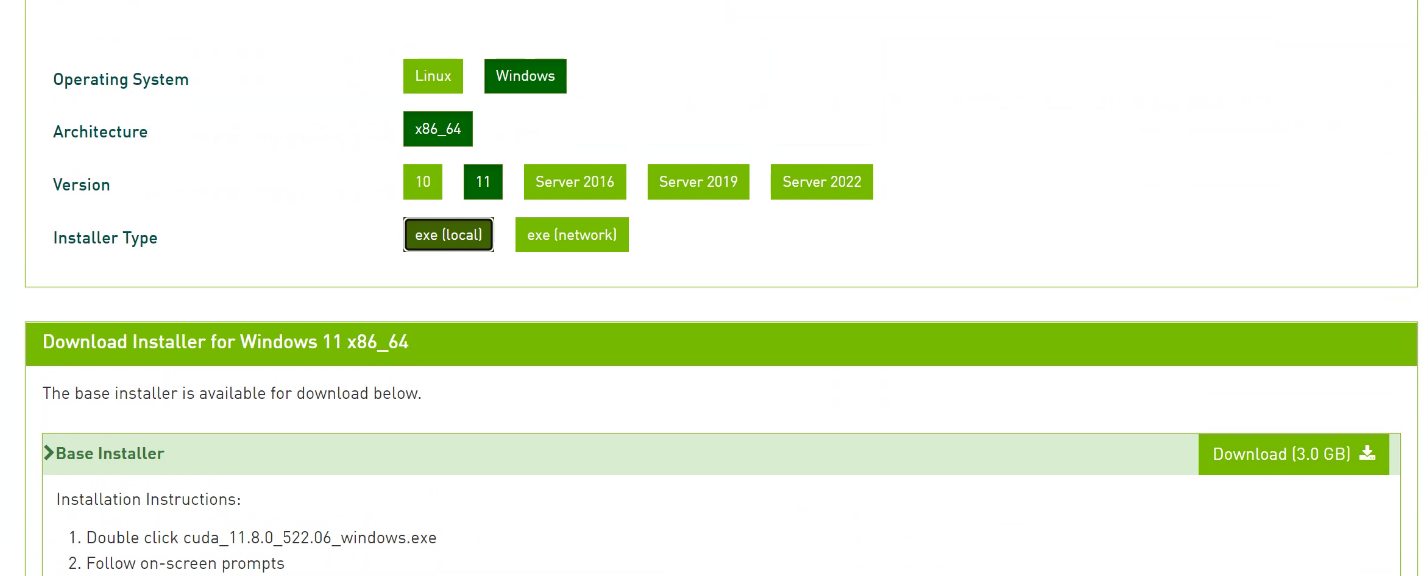
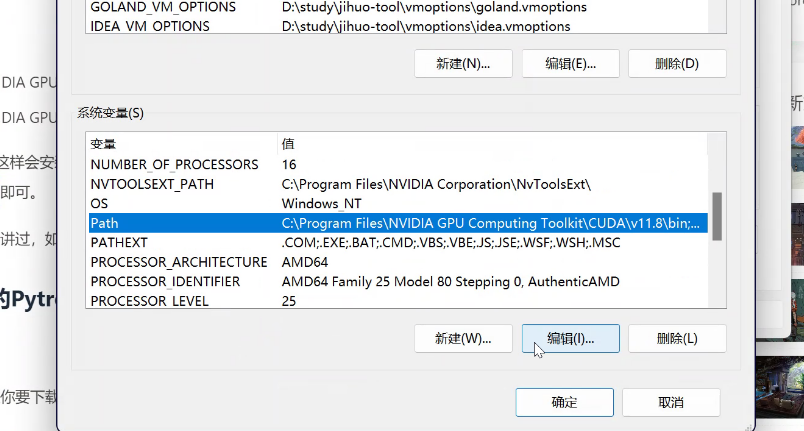
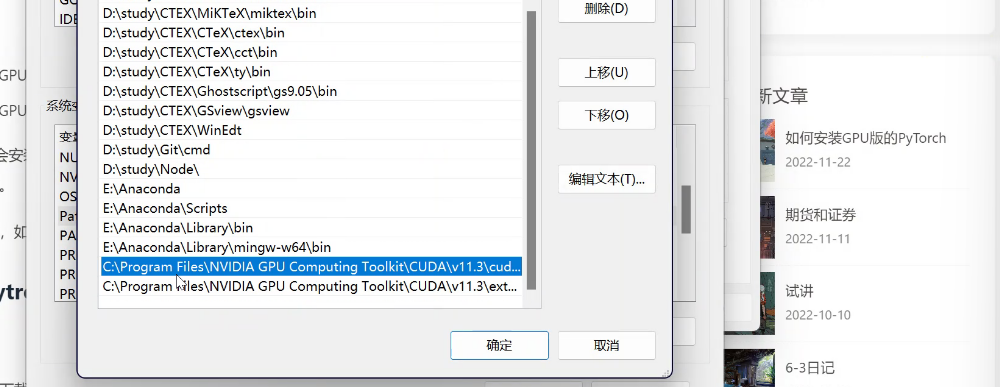
根据python版本以及cuda版本下载torchvision,下面将下载的文件导入到pytorch中这里需要用位置。之后下载对应版本的torchvision,需要将环境改变到自己下载的环境中
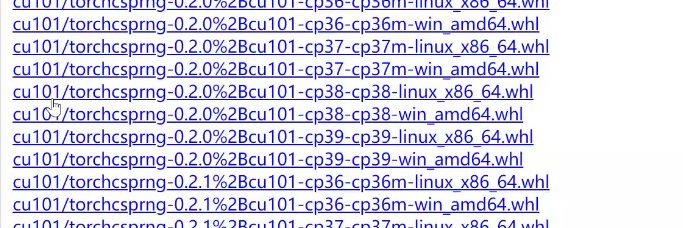
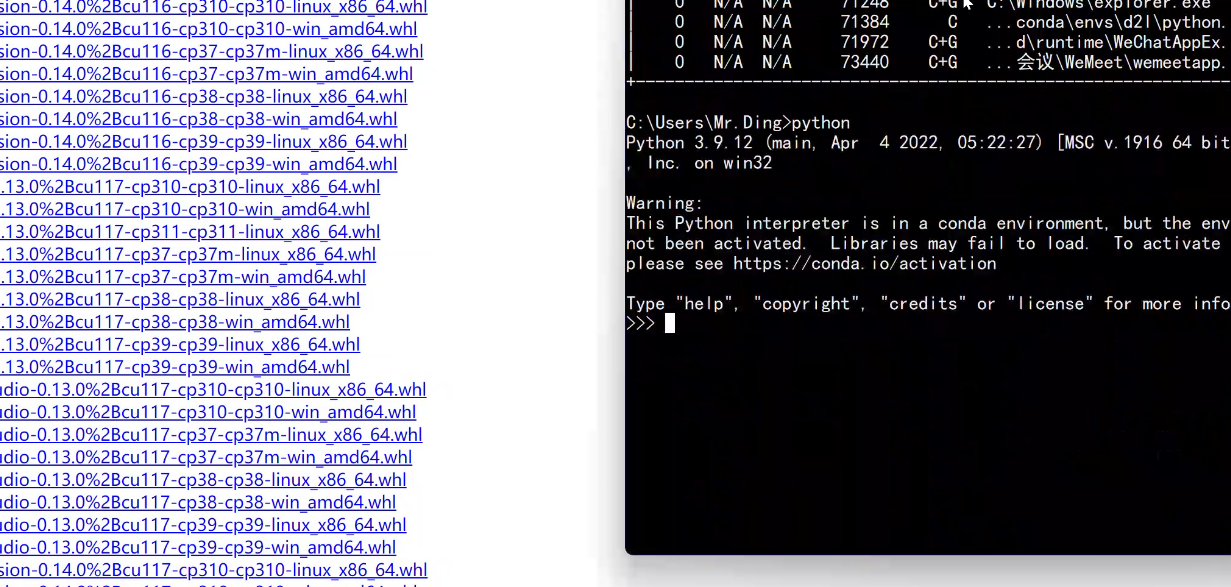
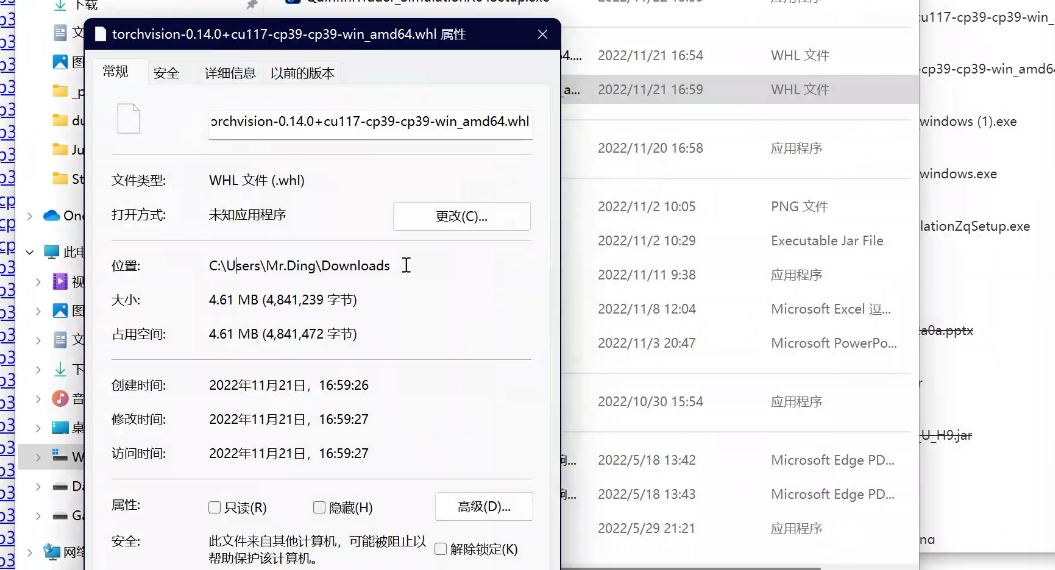
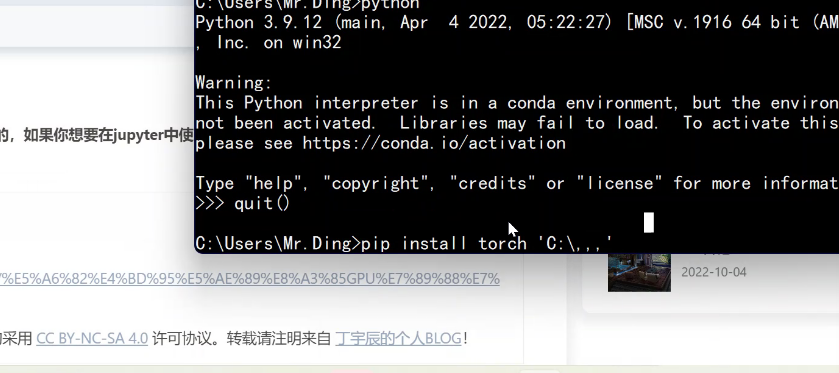
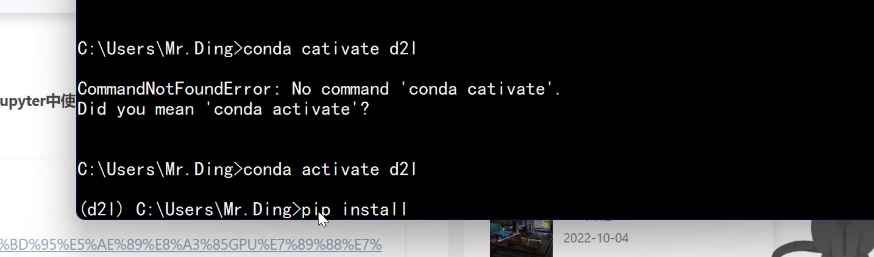
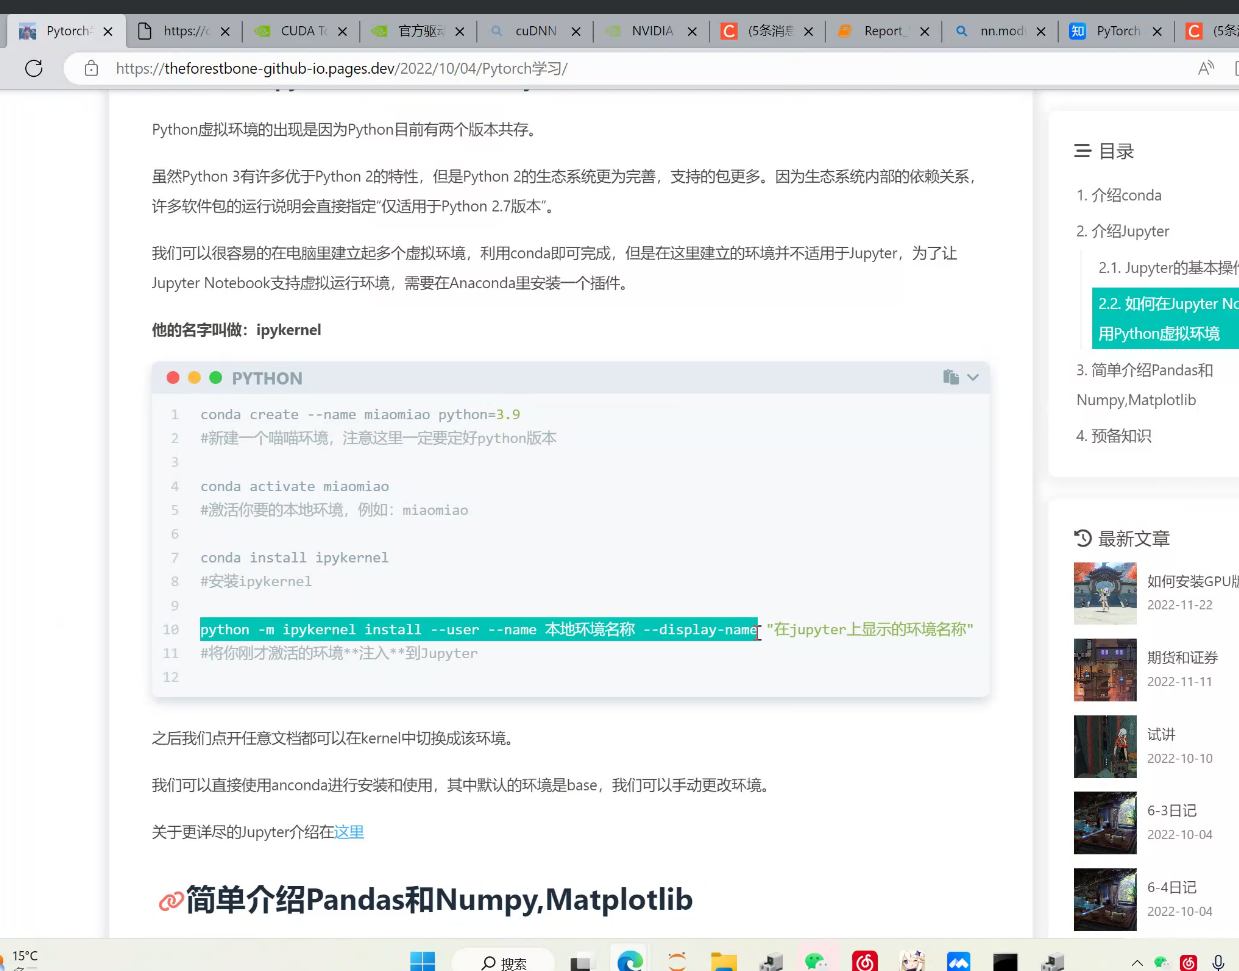

In [1]:
!nvidia-smi#电脑开启GPU可以使用的，AMD如何确定

Mon Nov 21 16:19:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.47       Driver Version: 526.47       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   41C    P0    23W /  N/A |   1245MiB /  6144MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

在pytorch中，每个数组都会有一个device接受，我们称之为context，一般来说变量和相关操作都在CPU上，但如果在服务器之间进行部署作业，比如一个服务器是GPU，另一个是CPU使用，会造成很多不必要的麻烦，所以我们更希望模型的参数在GPU上。

**在Pytorch上，CPU和GPU可以通过torch.device('CPU')和torch.device('GPU')表示。**
- CPU使用时会使用所有CPU和内存
- GPU使用时只代表一个卡和相应显存，如果有多个GPU，我们使用torch,device(f'cuda:{i}')来表示第i块GPU（i从0开始）

cuda:0和cuda等价

In [1]:
import torch
from torch import nn

torch.device('cpu'),torch.device('cuda'),torch.device('cuda:1')
#此处区分大小写

(device(type='cpu'), device(type='cuda'), device(type='cuda', index=1))

查询可用GPU数量

In [2]:
torch.cuda.device_count()

0

In [3]:
torch.cuda.is_available()

False

查看pytorch版本

In [4]:
print(torch.__version__)#结果是1.13.0+cpu117的时候说明还没有改变过来

1.12.1


In [5]:
def try_gpu(i=0):
    if torch.cuda.device_count() >= i+1:#如果GPu的数量大于等于i+1
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')


def try_all_gpus():
    devices = [torch.device(f'cuda:{i}')
        for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

In [6]:
try_gpu(),try_gpu(10),try_all_gpus()

(device(type='cpu'), device(type='cpu'), [device(type='cpu')])

In [26]:
def try_gpu(i=0):
    if torch.cuda.device_count() >= i+1:
        return torch.device(f'cuda:{i}')
    else:
        return torch.device('cpu')

def try_all_gpus():
    devices = [torch.device(f'cuda:{i}')
        for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

In [27]:
try_gpu(),try_gpu(10),try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

张量默认在CPU上创建：

在对张量进行处理时，一定要确保位于同一设备上

In [28]:
x = torch.tensor([1,2,3])
x.device

device(type='cpu')

存储在GPU上

In [29]:
x = torch.ones(2,3,device=try_gpu(0))#将张量x储存在第一个GPU上面
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [30]:
z = x.cuda(0)
print(x)
print(z)
#out

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [31]:
#如果数据在一个GPU上，我们可以将其相加
x+z

tensor([[2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

# 神经网络与GPU
我们将神经网络模型指定设备：

In [7]:
net = nn.Sequential(nn.Linear(3,1))
net = net.to(device=try_gpu())

之后输出net(X)后缀会加上device='cuda:0'，我们也可以通过加上后缀.device来确认模型参数在同一个GPU上。

In [8]:
net[0].weight.data.device

device(type='cpu')